## Sort by row

In [36]:
import pandas as pd
#import pandas as pd
df = pd.read_table(r"C:\Users\Administrator\Desktop\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only_3prime.txt", delimiter = '\t')#, nrows=2)
#make sure it's sorted by plate (it is but anyway)
dfs = df.groupby(df.well)

print(df.columns)
print(df.head())

Index(['IB', 'plate', 'well', 'C13', 'CD23', 'D13', 'R13', 'R23'], dtype='object')
                       IB     plate well   C13  CD23  D13   R13   R23
0  CCGGGCTGTACGCGTACGAACC  plate001  A02  1453  1933  910  1006  1346
1  CGCTAATAACCCACTGTGCGAA  plate001  A02   849  1273  787   687   879
2  ATCAGAATCGGGCGCAGCCCTT  plate001  A04  1424  1026  430   810   632
3  CGTGGCGCACGCCGCTTCAGGA  plate001  A05   802  1180  814  1498   598
4  CGGTGTGTGTTCGGTTCTTGAA  plate001  A06   401   753  225   365   293


In [27]:
well = df['well'].str.extract('([A-Za-z]+)', expand=False)
dfs = df.groupby(well).sum().reset_index()
print(dfs)

   well      C13     CD23      D13      R13      R23
0     A  4194711  7402314  4007448  4505411  3443390
1     B  3686195  6357669  3501842  3931282  2948964
2     C  3658712  6309609  3380476  4038410  2956614
3     D  3707803  6342631  3328474  4015983  2982542
4     E  3639566  6278841  3321509  3978340  2953940
5     F  3674827  6322606  3337532  3990343  2969421
6     G  3602167  6136894  3251344  3952108  2896893
7     H  3559409  6113492  3222095  3875176  2866948
8     I  3567243  6016020  3259821  3833349  2828897
9     J  3550356  6126898  3260149  3863343  2863288
10    K  3452715  5919645  3130457  3755046  2807621
11    L  3489045  6068065  3198880  3801484  2837585
12    M  3680169  6332906  3409815  3966428  2934590
13    N  3849653  6656582  3580910  4129947  3099846
14    O  3794049  6657357  3626856  4115503  3070631
15    P  4459665  7979289  4411858  4733325  3583425


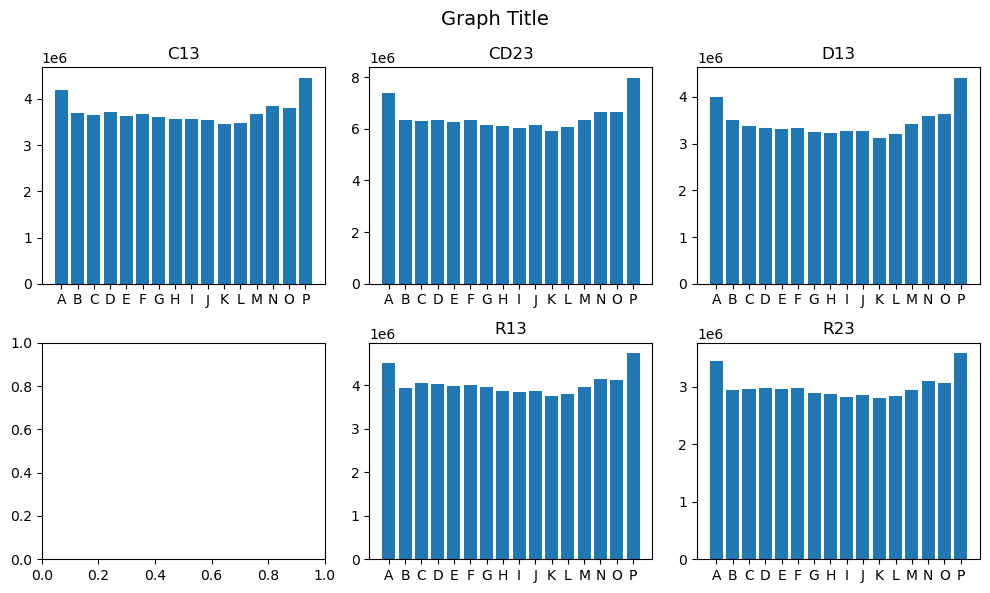

In [31]:
import matplotlib.pyplot as plt

# Set up the data
x = dfs['well']
y_c15 = dfs['C13']
y_c25 = dfs['CD23']
y_d15 = dfs['D13']
#y_d25 = dfs['D23']
y_r15 = dfs['R13']
y_r25 = dfs['R23']

# Create a figure with 6 subplots, arranged in 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Plot C15 data
axs[0, 0].bar(x, y_c15)
axs[0, 0].set_title('C13')

# Plot C25 data
axs[0, 1].bar(x, y_c25)
axs[0, 1].set_title('CD23')

# Plot D15 data
axs[0, 2].bar(x, y_d15)
axs[0, 2].set_title('D13')

# Plot D25 data
#axs[1, 0].bar(x, y_d25)
#axs[1, 0].set_title('D23')

# Plot R15 data
axs[1, 1].bar(x, y_r15)
axs[1, 1].set_title('R13')

# Plot R25 data
axs[1, 2].bar(x, y_r25)
axs[1, 2].set_title('R23')

# Add overall title to the figure
fig.suptitle('Graph Title', fontsize=14)

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()



## Sort by POSITION


In [37]:

#import pandas as pd
df = pd.read_table(r"C:\Users\Administrator\Desktop\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only_3prime.txt", delimiter = '\t')#, nrows=2)
#make sure it's sorted by plate (it is but anyway)
dfs = df.groupby(df.well)

#summarize per plate
summary_df = pd.DataFrame(columns=['well', 'C13', 'CD23', 'D13', 'R13', 'R23']) #'D25'
for well, group in dfs:
    sums = group[['C13', 'CD23', 'D13', 'R13', 'R23']].sum()
    row = {'well': well, 'C13': sums['C13'], 'CD23': sums['CD23'], 'D13': sums['D13'], 'R13': sums['R13'], 'R23': sums['R23']} #'D25': sums['D25'],
    summary_df = pd.concat([summary_df, pd.DataFrame([row])], ignore_index=True)

# Print the summary dataframe
print(summary_df)

    well     C13    CD23     D13     R13     R23
0    A01  197603  327566  177670  204423  154418
1    A02  187312  326149  172563  202367  154732
2    A03  194253  340782  187373  207469  162230
3    A04  173232  311645  164185  184361  139217
4    A05  189702  327823  176757  211635  158419
..   ...     ...     ...     ...     ...     ...
379  P20  171178  304270  166095  181150  136665
380  P21  199089  364430  199374  200870  160423
381  P22  205889  370672  199016  217488  162856
382  P23  182972  333275  194888  201920  146135
383  P24  195981  353923  201468  214283  160188

[384 rows x 6 columns]


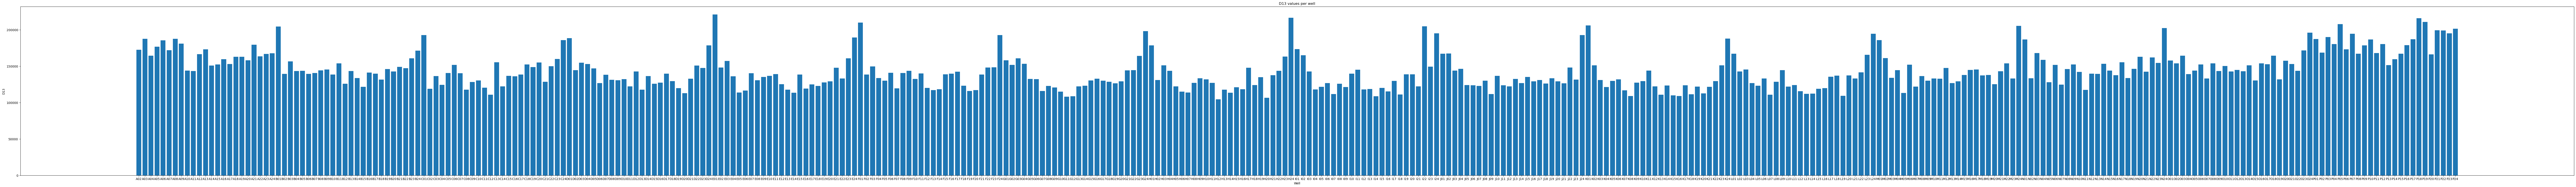

In [38]:
summary_df= summary_df.drop(summary_df.index[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['D13'])
plt.xlabel('Well')
plt.ylabel('D13')
plt.title('D13 values per well')


# Show the plot
plt.show()

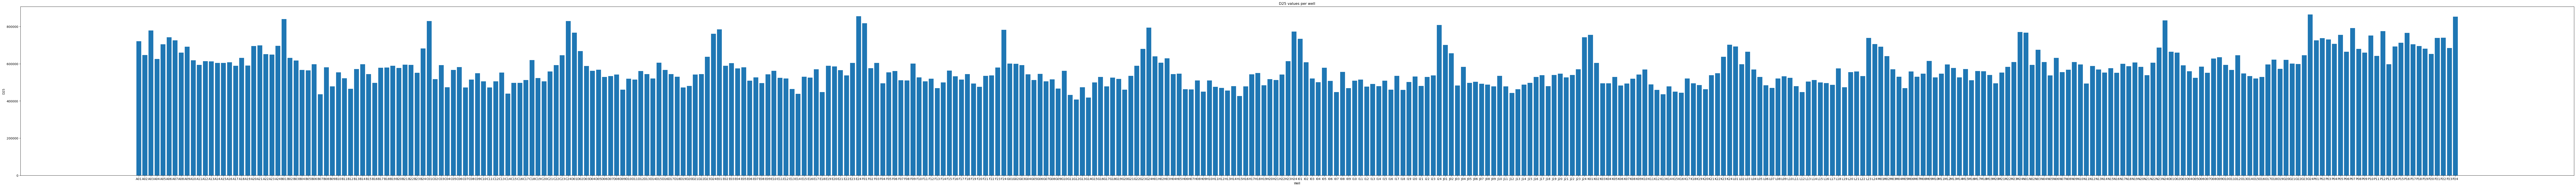

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['CD23'])
plt.xlabel('Well')
plt.ylabel('CD23')
plt.title('CD23 values per well')



# Show the plot
plt.show()

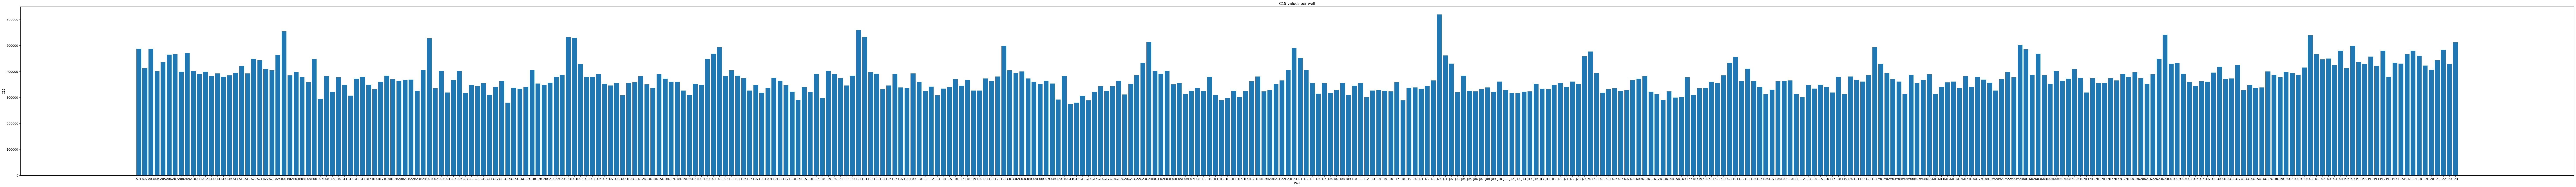

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['C15'])
plt.xlabel('Well')
plt.ylabel('C15')
plt.title('C15 values per well')



# Show the plot
plt.show()

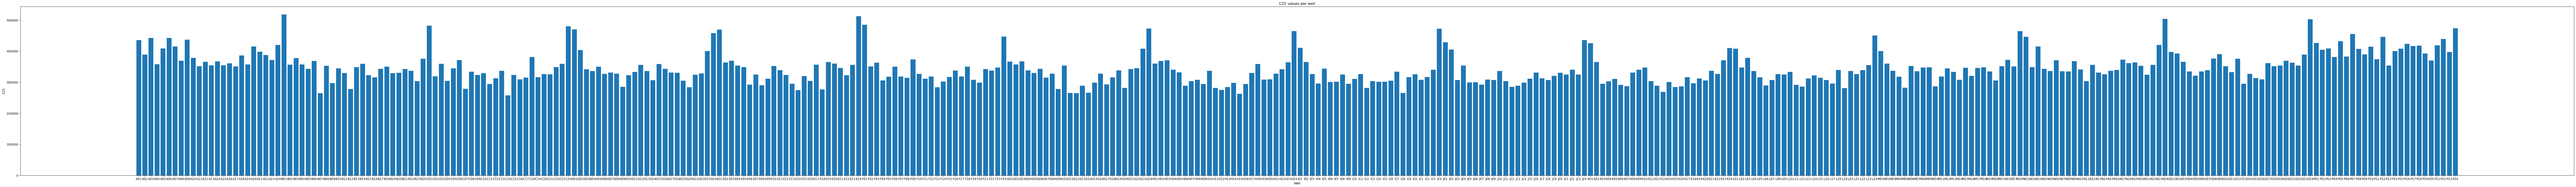

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['C25'])
plt.xlabel('Well')
plt.ylabel('C25')
plt.title('C25 values per well')


# Show the plot
plt.show()

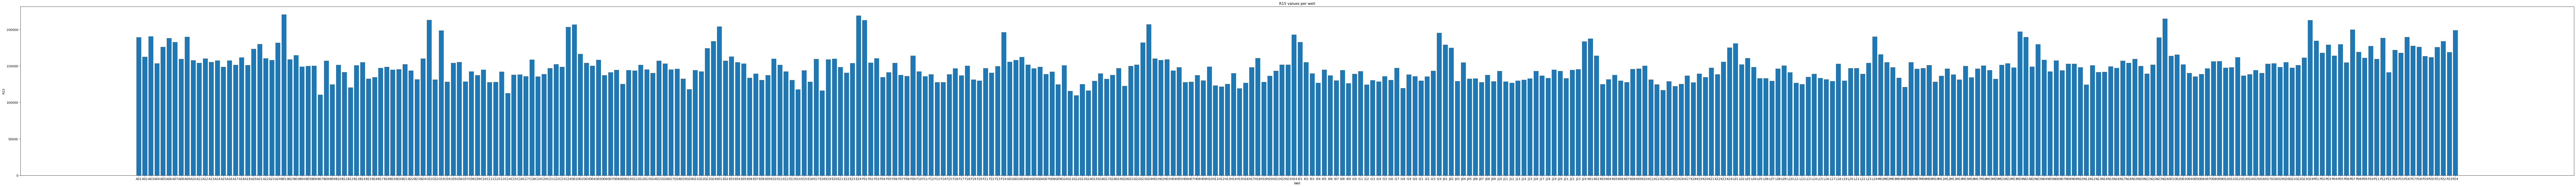

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['R15'])
plt.xlabel('Well')
plt.ylabel('R15')
plt.title('R15 values per well')



# Show the plot
plt.show()


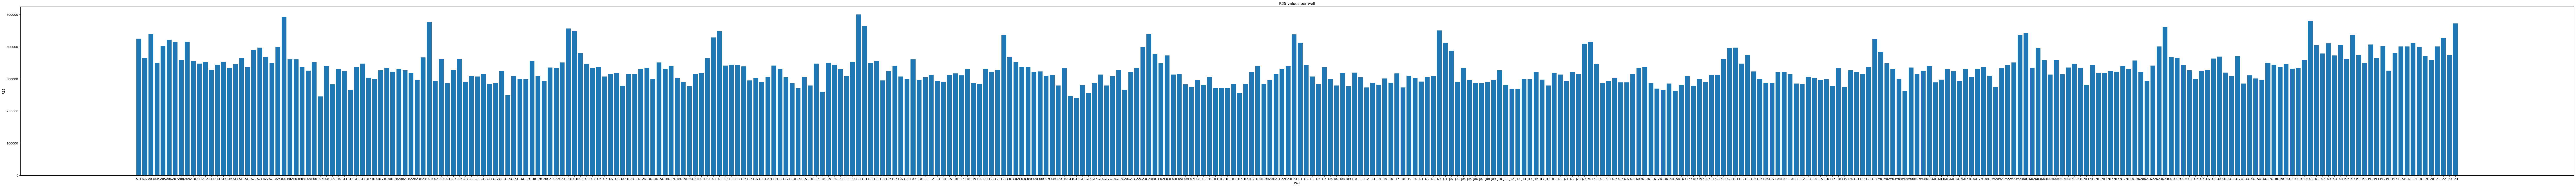

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 10))
plt.bar(summary_df['well'], summary_df['R25'])
plt.xlabel('Well')
plt.ylabel('R25')
plt.title('R25 values per well')


# Show the plot
plt.show()